In [3]:
import pandas as pd

#Loading dataset
url = "https://gist.githubusercontent.com/designernatan/27da044c6dc823f7ac7fe3a01f4513ed/raw/vgsales.csv"
df = pd.read_csv(url)

df.head()

print(df.shape)
print(df.info())
print(df.isnull().sum())

#Data Cleaning
df_clean = df.dropna().copy()
print("✅ New shape:", df_clean.shape)


(16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
✅ New shape: (16291,

/tmp/ipython-input-4-2564577999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


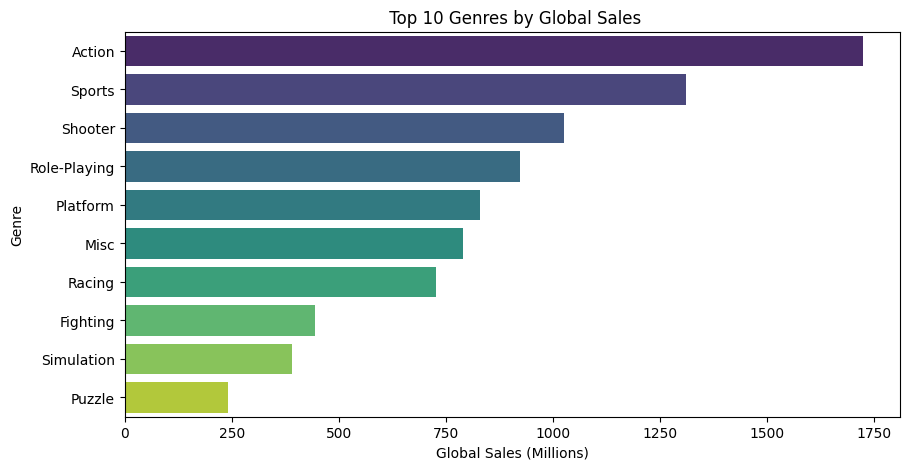

In [4]:
#Top 10 Genres by Global Sales
import seaborn as sns
import matplotlib.pyplot as plt

top_genres = df_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title(" Top 10 Genres by Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-5-1139093145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='magma')


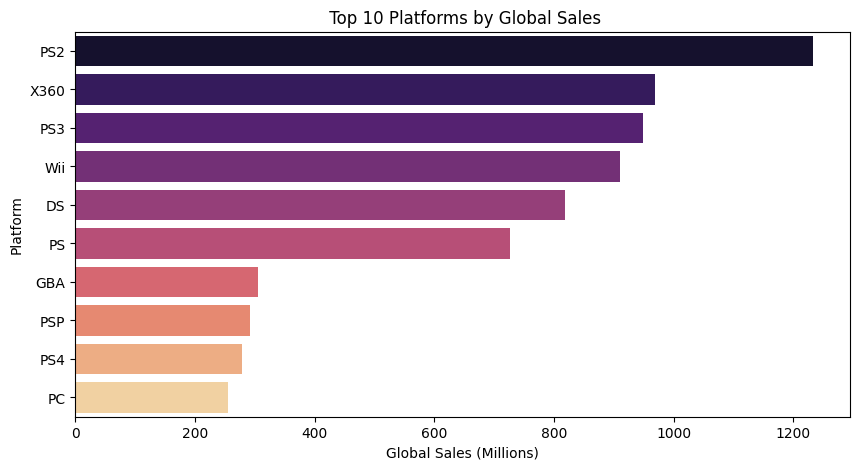

In [5]:
#Top Platforms by Total Sales
top_platforms = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='magma')
plt.title(" Top 10 Platforms by Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Platform")
plt.show()


/tmp/ipython-input-6-285177189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='cubehelix')


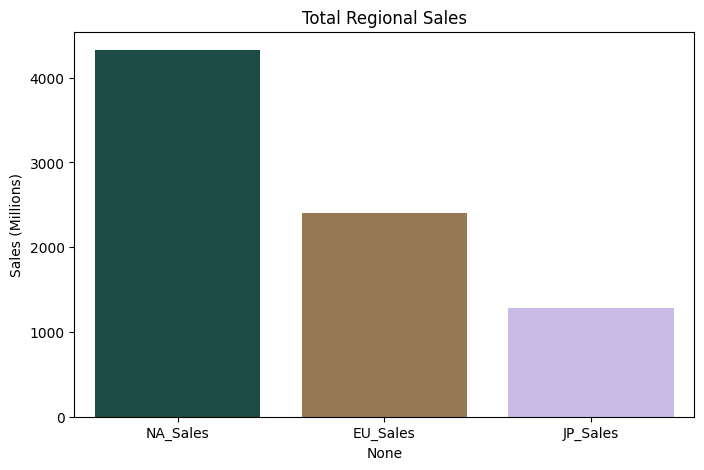

In [6]:
#Compare Sales by Region (NA vs EU vs JP)
region_sales = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='cubehelix')
plt.title("Total Regional Sales")
plt.ylabel("Sales (Millions)")
plt.show()


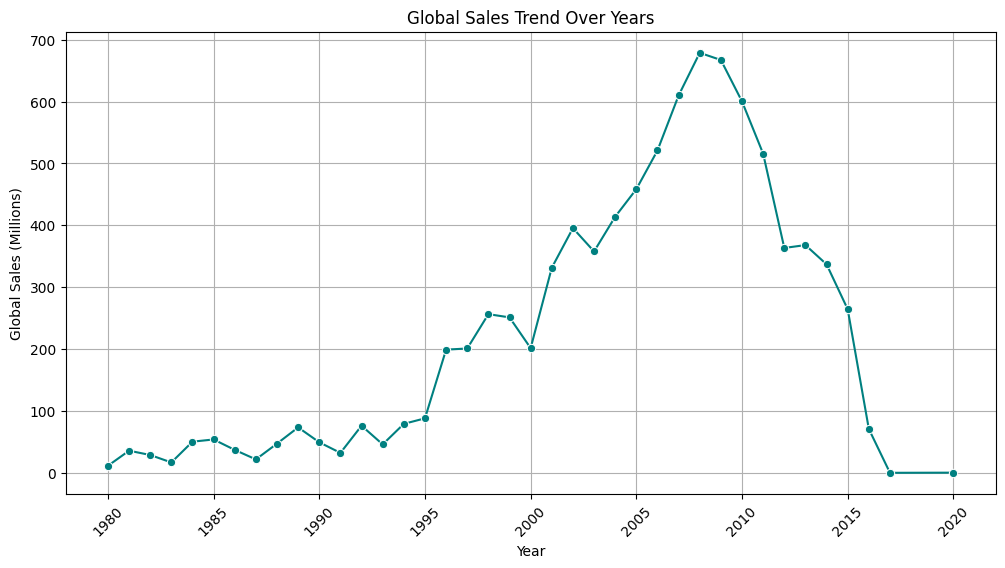

In [7]:
#Global Sales by Year (Trend Over Time)
yearly_sales = df_clean.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='teal')
plt.title("Global Sales Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


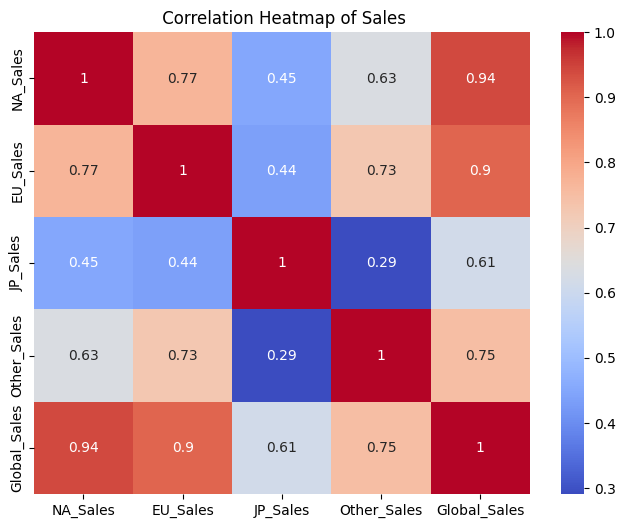

In [8]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap of Sales")
plt.show()


In [9]:
#Predicting Global Sales using xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

# Select features and target
features = ['Platform', 'Genre', 'Publisher', 'Year']
X = df_clean[features]
y = df_clean['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.32, random_state=42
)


In [10]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Platform', 'Genre', 'Publisher'])
    ],
    remainder='passthrough'  # keep 'Year'
)

# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              ena...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [12]:
# Predict
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" XGBoost RMSE: {rmse:.4f}")
print(f" XGBoost MAE: {mae:.4f}")
print(f" XGBoost R²: {r2:.4f}")


 XGBoost RMSE: 1.6849
 XGBoost MAE: 0.4897
 XGBoost R²: 0.1043
